# SVM FOR DATASET 1

In [5]:
import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.metrics import roc_auc_score,make_scorer

In [6]:
df = pd.read_csv("project3_dataset1.txt",sep='\t',header=None)

In [7]:
X = df.select_dtypes(include=['float64'])
y = df.iloc[: , -1]

mms = MinMaxScaler()
X = mms.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
svm1 = svm.SVC(kernel='linear')
svm1.fit(X_test,y_test)
y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)

### Results

In [9]:
print("The metrics for dataset 1 are : \n",classification_report(y_test,y_test_pred))
print("\n The accuracy for dataset 1 is : ",accuracy_score(y_test,y_test_pred))

The metrics for dataset 1 are : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        74
           1       0.97      0.90      0.94        40

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114


 The accuracy for dataset 1 is :  0.956140350877193


# HYPER PARAMETER TUNING FOR SVM

In [13]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01,10]
             } 
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score),"F1":"f1","Precision":"precision","Recall":"recall"}
  
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid=param_grid,refit="Accuracy", verbose = 3,cv=10,scoring=scoring,return_train_score=True)
# fitting the model for grid search
grid.fit(X_train, y_train)



Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END C=0.1, gamma=1; AUC: (train=0.991, test=1.000) Accuracy: (train=0.961, test=0.978) F1: (train=0.945, test=0.971) Precision: (train=1.000, test=1.000) Recall: (train=0.896, test=0.944) total time=   0.0s
[CV 2/10] END C=0.1, gamma=1; AUC: (train=0.992, test=0.986) Accuracy: (train=0.961, test=0.935) F1: (train=0.945, test=0.914) Precision: (train=1.000, test=0.941) Recall: (train=0.896, test=0.889) total time=   0.0s
[CV 3/10] END C=0.1, gamma=1; AUC: (train=0.991, test=0.994) Accuracy: (train=0.956, test=0.978) F1: (train=0.939, test=0.970) Precision: (train=0.986, test=1.000) Recall: (train=0.897, test=0.941) total time=   0.0s
[CV 4/10] END C=0.1, gamma=1; AUC: (train=0.993, test=0.984) Accuracy: (train=0.963, test=0.891) F1: (train=0.949, test=0.828) Precision: (train=1.000, test=1.000) Recall: (train=0.903, test=0.706) total time=   0.0s
[CV 5/10] END C=0.1, gamma=1; AUC: (train=0.991, test=0.996) Accuracy

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 10]},
             refit='Accuracy', return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),
                      'F1': 'f1', 'Precision': 'precision',
                      'Recall': 'recall'},
             verbose=3)

In [14]:
print(grid.best_params_)

{'C': 1, 'gamma': 1}


In [15]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
score = roc_auc_score(y_test, grid_predictions)
print(f"ROC AUC: {score:.4f}")

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        74
           1       0.97      0.95      0.96        40

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC AUC: 0.9682


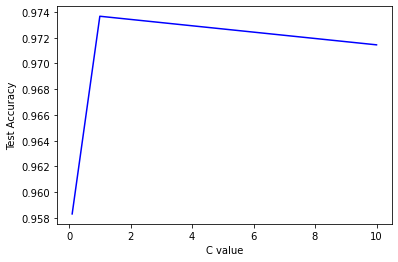

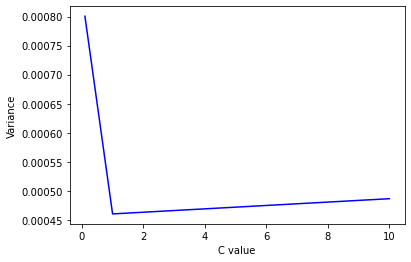

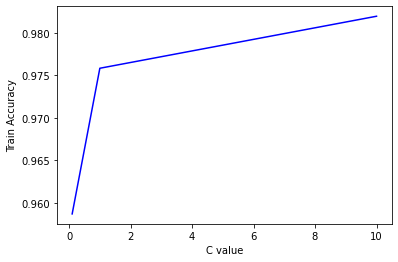

In [24]:
df = pd.DataFrame(grid.cv_results_)
df1=df.sort_values(by='param_C')

x = df1['param_C']
y=df['mean_test_Accuracy']
z=df['std_test_Accuracy'] * df1['std_test_Accuracy']
m=df['mean_train_Accuracy']
fig = plt.figure()
ax = plt.axes()
plt.xlabel("C value")
plt.ylabel("Test Accuracy")
ax.plot(x,y,color='blue')
plt.show()
fig = plt.figure()
ax = plt.axes()
plt.xlabel("C value")
plt.ylabel("Variance")
ax.plot(x,z,color='blue')
plt.show()
fig = plt.figure()
ax = plt.axes()
plt.xlabel("C value")
plt.ylabel("Train Accuracy")
ax.plot(x,m,color='blue')
plt.show()

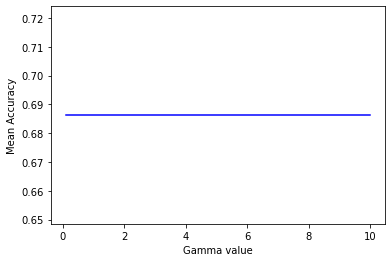

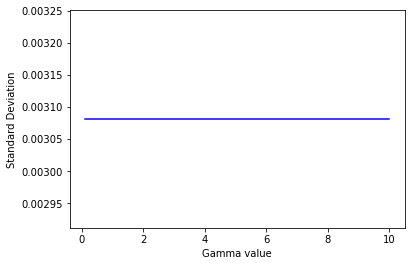

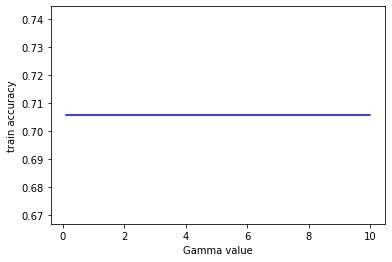

In [51]:
df = pd.DataFrame(grid.cv_results_)

df=df.groupby(['param_gamma']).mean()


x = df.index
y=df['mean_test_Accuracy']
z=df['std_test_Accuracy'] * df['std_test_Accuracy']
m=df['mean_train_Accuracy']
fig = plt.figure()
ax = plt.axes()
plt.xlabel("Gamma value")
plt.ylabel("Mean Accuracy")
ax.plot(x,y,color='blue')
plt.show()
fig = plt.figure()
ax = plt.axes()
plt.xlabel("Gamma value")
plt.ylabel("Standard Deviation")
ax.plot(x,z,color='blue')
plt.show()

fig = plt.figure()
ax = plt.axes()
plt.xlabel("Gamma value")
plt.ylabel("train accuracy")
ax.plot(x,m,color='blue')
plt.show()

# 10 FOLD CROSS VALIDATION

In [34]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, f1_score

scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

svm1 = svm.SVC(kernel='linear', C = 0.01)
ct=0
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    svm1.fit(x_train_fold, y_train_fold)
    y_pred=svm1.predict(x_test_fold)
    lst_accu_stratified.append(svm1.score(x_test_fold, y_test_fold))
    accr = accuracy_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    roc = roc_auc_score(y_test_fold, y_pred, average='weighted')
    print(f"Fold: {ct}. Accuracy = {accr:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, AUC = {roc:.3f}")
    ct+=1

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Fold: 0. Accuracy = 0.912, precision = 1.000, recall = 0.773, f1 = 0.872, AUC = 0.886
Fold: 1. Accuracy = 0.825, precision = 1.000, recall = 0.545, f1 = 0.706, AUC = 0.773
Fold: 2. Accuracy = 0.895, precision = 1.000, recall = 0.714, f1 = 0.833, AUC = 0.857
Fold: 3. Accuracy = 0.860, precision = 1.000, recall = 0.619, f1 = 0.765, AUC = 0.810
Fold: 4. Accuracy = 0.842, precision = 1.000, recall = 0.571, f1 = 0.727, AUC = 0.786
Fold: 5. Accuracy = 0.895, precision = 1.000, recall = 0.714, f1 = 0.833, AUC = 0.857
Fold: 6. Accuracy = 0.912, precision = 1.000, recall = 0.762, f1 = 0.865, AUC = 0.881
Fold: 7. Accuracy = 0.860, precision = 1.000, recall = 0.619, f1 = 0.765, AUC = 0.810
Fold: 8. Accuracy = 0.825, precision = 1.000, recall = 0.524, f1 = 0.688, AUC = 0.762
Fold: 9. Accuracy = 0.893, precision = 1.000, recall = 0.714, f1 = 0.833, AUC = 0.857
List of possible accuracy: [0.9122807017543859, 0.8245614035087719, 0.8947368421052632, 0.8596491228070176, 0.8421052631578947, 0.8947368421

# SVM FOR DATASET 2

In [46]:
df = pd.read_csv("project3_dataset2.txt",sep='\t',header=None)

In [47]:
df[df.isna().any(axis=1)]
df.loc[ df[4] == 'Absent', 4] = 0
df.loc[ df[4] == 'Present', 4] = 1

X=df.iloc[:, 0:8]
y=df.iloc[:,-1]

mms = MinMaxScaler()
X = mms.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
svm1 = svm.SVC(kernel="linear")
svm1.fit(X_test,y_test)
y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)

In [49]:
print("The metrics for dataset 2 are : \n",classification_report(y_test,y_test_pred))
print("\n The accuracy for dataset 2 is : ",accuracy_score(y_test,y_test_pred))

The metrics for dataset 2 are : 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        88
           1       0.63      0.63      0.63        51

    accuracy                           0.73       139
   macro avg       0.71      0.71      0.71       139
weighted avg       0.73      0.73      0.73       139


 The accuracy for dataset 2 is :  0.7266187050359713


In [50]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1,10]
             } 
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score),"F1":"f1","Precision":"precision","Recall":"recall"}
  
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid=param_grid,refit="Accuracy", verbose = 3,cv=10,scoring=scoring,return_train_score=True)
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END C=0.1, gamma=1; AUC: (train=0.773, test=0.587) Accuracy: (train=0.662, test=0.667) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END C=0.1, gamma=1; AUC: (train=0.763, test=0.661) Accuracy: (train=0.662, test=0.667) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   0.0s
[CV 3/10] END C=0.1, gamma=1; AUC: (train=0.761, test=0.740) Accuracy: (train=0.662, test=0.667) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END C=0.1, gamma=1; AUC: (train=0.764, test=0.645) Accuracy: (train=0.660, test=0.688) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END C=0.1, gamma=1; AUC: (train=0.775, test=0.576) Accuracy: 

/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/met

[CV 7/10] END C=0.1, gamma=0.1; AUC: (train=0.755, test=0.766) Accuracy: (train=0.663, test=0.656) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END C=0.1, gamma=0.1; AUC: (train=0.740, test=0.874) Accuracy: (train=0.663, test=0.656) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END C=0.1, gamma=0.1; AUC: (train=0.748, test=0.892) Accuracy: (train=0.663, test=0.656) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END C=0.1, gamma=0.1; AUC: (train=0.755, test=0.753) Accuracy: (train=0.663, test=0.656) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END C=0.1, gamma=10; AUC: (train=0.773, test=0.587) Accuracy: (train=0.662, test=0.667) F1: (train=0.000, test=0.

/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/met

[CV 9/10] END C=1, gamma=1; AUC: (train=0.748, test=0.883) Accuracy: (train=0.711, test=0.688) F1: (train=0.354, test=0.286) Precision: (train=0.719, test=0.667) Recall: (train=0.235, test=0.182) total time=   0.0s
[CV 10/10] END C=1, gamma=1; AUC: (train=0.757, test=0.766) Accuracy: (train=0.718, test=0.719) F1: (train=0.423, test=0.526) Precision: (train=0.682, test=0.625) Recall: (train=0.306, test=0.455) total time=   0.0s
[CV 1/10] END C=1, gamma=0.1; AUC: (train=0.774, test=0.558) Accuracy: (train=0.731, test=0.606) F1: (train=0.524, test=0.235) Precision: (train=0.652, test=0.333) Recall: (train=0.439, test=0.182) total time=   0.0s
[CV 2/10] END C=1, gamma=0.1; AUC: (train=0.765, test=0.653) Accuracy: (train=0.714, test=0.788) F1: (train=0.443, test=0.588) Precision: (train=0.647, test=0.833) Recall: (train=0.337, test=0.455) total time=   0.0s
[CV 3/10] END C=1, gamma=0.1; AUC: (train=0.762, test=0.719) Accuracy: (train=0.734, test=0.667) F1: (train=0.476, test=0.267) Precisio

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 10]},
             refit='Accuracy', return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),
                      'F1': 'f1', 'Precision': 'precision',
                      'Recall': 'recall'},
             verbose=3)

In [43]:
print(grid.best_params_)

{'C': 10, 'gamma': 1}


In [44]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))
score = roc_auc_score(y_test, grid_predictions)
print(f"ROC AUC: {score:.4f}")

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        62
           1       0.62      0.48      0.55        31

    accuracy                           0.73        93
   macro avg       0.70      0.67      0.68        93
weighted avg       0.72      0.73      0.72        93

ROC AUC: 0.6694


In [43]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, f1_score
#df = pd.read_csv("project3_dataset1.txt",sep='\t',header=None)

#X = df.select_dtypes(include=['float64'])
#y = df.iloc[: , -1]

scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)
ct=0
svm1 = svm.SVC(kernel='linear', C = 0.01)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    svm1.fit(x_train_fold, y_train_fold)
    y_pred=svm1.predict(x_test_fold)
    lst_accu_stratified.append(svm1.score(x_test_fold, y_test_fold))
    accr = accuracy_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    roc = roc_auc_score(y_test_fold, y_pred, average='weighted')
    print(f"Fold: {ct}. Accuracy = {accr:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, AUC = {roc:.3f}")
    ct+=1

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Fold: 0. Accuracy = 0.660, precision = 0.000, recall = 0.000, f1 = 0.000, AUC = 0.500
Fold: 1. Accuracy = 0.660, precision = 0.000, recall = 0.000, f1 = 0.000, AUC = 0.500
Fold: 2. Accuracy = 0.652, precision = 0.000, recall = 0.000, f1 = 0.000, AUC = 0.500
Fold: 3. Accuracy = 0.652, precision = 0.000, recall = 0.000, f1 = 0.000, AUC = 0.500
Fold: 4. Accuracy = 0.652, precision = 0.000, recall = 0.000, f1 = 0.000, AUC = 0.500
Fold: 5. Accuracy = 0.652, precision = 0.000, recall = 0.000, f1 = 0.000, AUC = 0.500
Fold: 6. Accuracy = 0.652, precision = 0.000, recall = 0.000, f1 = 0.000, AUC = 0.500
Fold: 7. Accuracy = 0.652, precision = 0.000, recall = 0.000, f1 = 0.000, AUC = 0.500
Fold: 8. Accuracy = 0.652, precision = 0.000, recall = 0.000, f1 = 0.000, AUC = 0.500
Fold: 9. Accuracy = 0.652, precision = 0.000, recall = 0.000, f1 = 0.000, AUC = 0.500
List of possible accuracy: [0.6595744680851063, 0.6595744680851063, 0.6521739130434783, 0.6521739130434783, 0.6521739130434783, 0.6521739130

/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/met

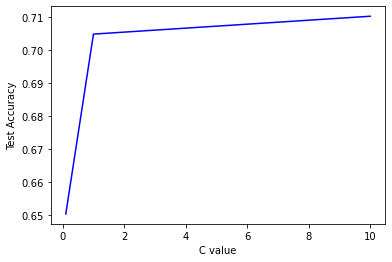

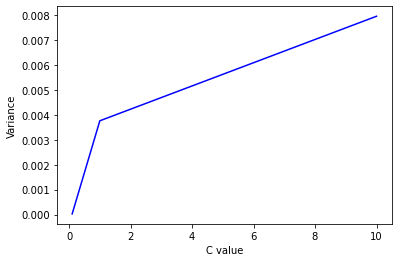

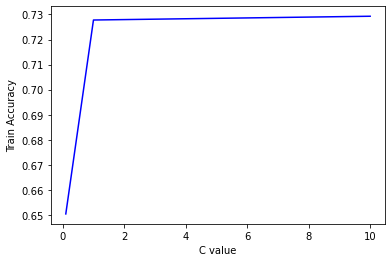

In [45]:
df = pd.DataFrame(grid.cv_results_)
df1=df.sort_values(by='param_C')

x = df1['param_C']
y=df['mean_test_Accuracy']
z=df['std_test_Accuracy'] * df1['std_test_Accuracy']
m=df['mean_train_Accuracy']
fig = plt.figure()
ax = plt.axes()
plt.xlabel("C value")
plt.ylabel("Test Accuracy")
ax.plot(x,y,color='blue')
plt.show()
fig = plt.figure()
ax = plt.axes()
plt.xlabel("C value")
plt.ylabel("Variance")
ax.plot(x,z,color='blue')
plt.show()
fig = plt.figure()
ax = plt.axes()
plt.xlabel("C value")
plt.ylabel("Train Accuracy")
ax.plot(x,m,color='blue')
plt.show()

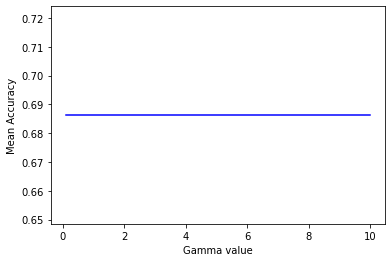

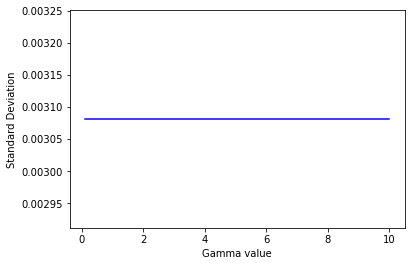

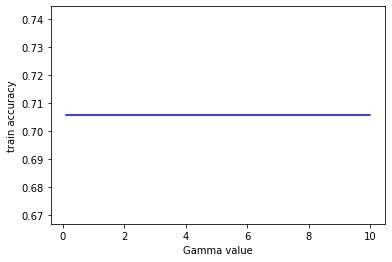

In [52]:
df = pd.DataFrame(grid.cv_results_)

df=df.groupby(['param_gamma']).mean()


x = df.index
y=df['mean_test_Accuracy']
z=df['std_test_Accuracy'] * df['std_test_Accuracy']
m=df['mean_train_Accuracy']
fig = plt.figure()
ax = plt.axes()
plt.xlabel("Gamma value")
plt.ylabel("Mean Accuracy")
ax.plot(x,y,color='blue')
plt.show()
fig = plt.figure()
ax = plt.axes()
plt.xlabel("Gamma value")
plt.ylabel("Standard Deviation")
ax.plot(x,z,color='blue')
plt.show()

fig = plt.figure()
ax = plt.axes()
plt.xlabel("Gamma value")
plt.ylabel("train accuracy")
ax.plot(x,m,color='blue')
plt.show()